### <div class="alert alert-info">Name: Dnyanai Surkutwar <br>Email: dsurkutwar@scu.edu  <br>Student ID: 00001586576 <br><center>Quiz#5<center></div>

### Import libraries

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from tkinter.filedialog import askopenfilename
from tkinter.filedialog import askdirectory 
from tkinter import Tk

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Asking the user for input file 

In [2]:
## Letting the user select the file using tkinter openfiledialog
train_input_path = ''
root = Tk()
root.attributes("-topmost", True)
root.withdraw()
root.filename = askopenfilename(title = "Select file",filetypes = (("CSV File","*.csv"),("Excel File","*.xls"),\
                                                                       ("Text document","*.txt"),("All Files","*.*")))
if not root.filename:
    print('No file selected',root.filename)
else:
    train_input_path = root.filename
root.destroy()

In [3]:
print(train_input_path)

C:/Users/Karthik Pyapali/Desktop/DS/1.MSIS/Q3/ML/git/py3Notes/MachineLearning/Quiz#5/pendigits_training.txt


### Asking the user for the folder where they want the CSV file to be save

In [4]:
train_output_path=''
root = Tk()
root.attributes("-topmost", True)
root.withdraw()
root.directory = askdirectory()
train_output_path = root.directory
print(train_output_path)

C:/Users/Karthik Pyapali/Desktop/DS/1.MSIS/Q3/ML/git/py3Notes/MachineLearning/Quiz#5


### Saving the training dataset to CSV, we are considering the delimiter/separatora s space so no matter how many spaces are there between the datapoints it wll ignore it 

In [5]:
if 'csv' in train_output_path:
    pass
else:
    train_output_path = train_output_path+'/'+'df_training.csv'

read_file = pd.read_csv(train_input_path,delim_whitespace=True,header=None)

read_file.to_csv(train_output_path,index=None,header=None)


In [6]:
read_file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


### We are creating the training datafram using padnas

In [7]:
df_train = pd.read_csv(train_output_path,header=None)

In [8]:
df_train.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

### Letss plot a histogram to understand the common data in the dataset. The count is shown on the histogram so we can get an idea to see which Dimension/feature/predictor are mostly used

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F3DE04A08>,
      dtype=object)

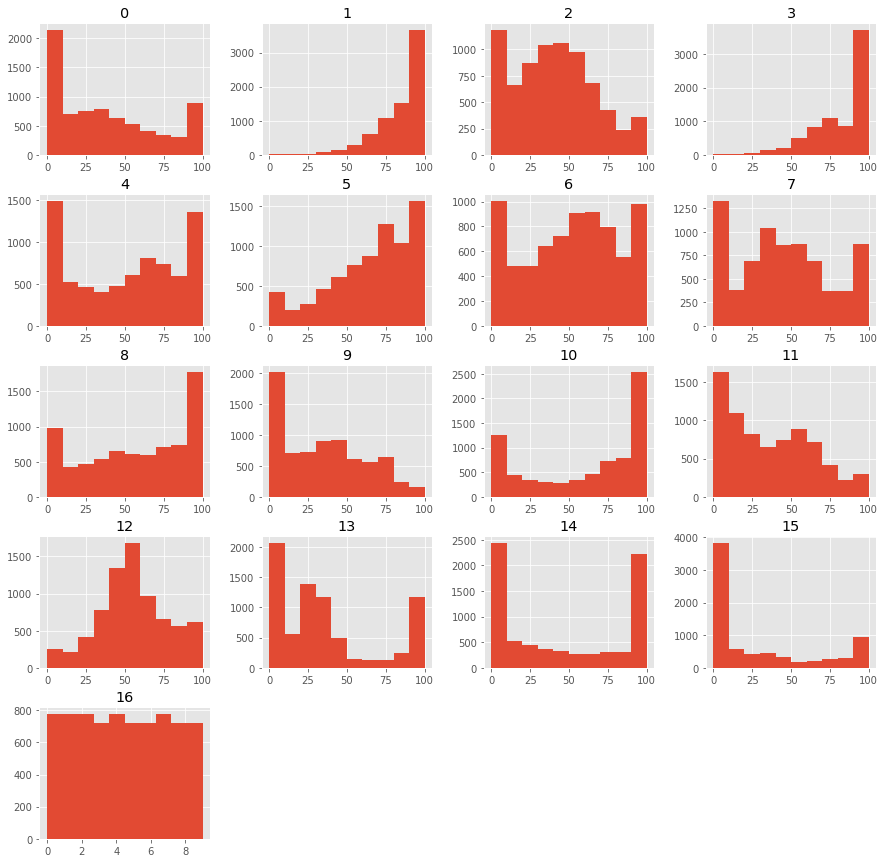

In [9]:
plt.style.use('ggplot')
pd.DataFrame.hist(df_train, figsize=[15,15])

### We notice that for the training dataset , few features/dimensions are more frequent compared to others in the dataset. This can create a bias towards more dominant features/dimensions in the dataset. Therefore, we need to normalize and transform the data to avoid any bias in the model 

### Lets first divide the training data into X - dimensions and Y - target data

In [10]:
ini_X_train = df_train.drop(columns=16,axis=1)
ini_Y_train = df_train[16]

### Doing the same steps from above for the test dataset

In [11]:
## Letting the user select the file using tkinter openfiledialog
test_input_path = ''
root = Tk()
root.attributes("-topmost", True)
root.withdraw()
root.filename = askopenfilename(title = "Select file",filetypes = (("CSV File","*.csv"),("Excel File","*.xls"),\
                                                                       ("Text document","*.txt"),("All Files","*.*")))
if not root.filename:
    print('No file selected',root.filename)
else:
    test_input_path = root.filename
    print(test_input_path)
root.destroy()

C:/Users/Karthik Pyapali/Desktop/DS/1.MSIS/Q3/ML/git/py3Notes/MachineLearning/Quiz#5/pendigits_test.txt


In [12]:
test_output_path=''
root = Tk()
root.attributes("-topmost", True)
root.withdraw()
root.directory = askdirectory()
test_output_path = root.directory
print(test_output_path)

C:/Users/Karthik Pyapali/Desktop/DS/1.MSIS/Q3/ML/git/py3Notes/MachineLearning/Quiz#5


### Saving to df_test.csv and making a dataframe on the test data

In [13]:
if "csv" in test_output_path:
    pass
else:
    test_output_path = test_output_path+'/'+'df_test.csv'

read_file = pd.read_csv(test_input_path,delim_whitespace=True,header=None)
read_file.to_csv(test_output_path, index=None,header=None)

In [14]:
df_test = pd.read_csv(test_output_path,header=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F4280BA88>,
      dtype=object)

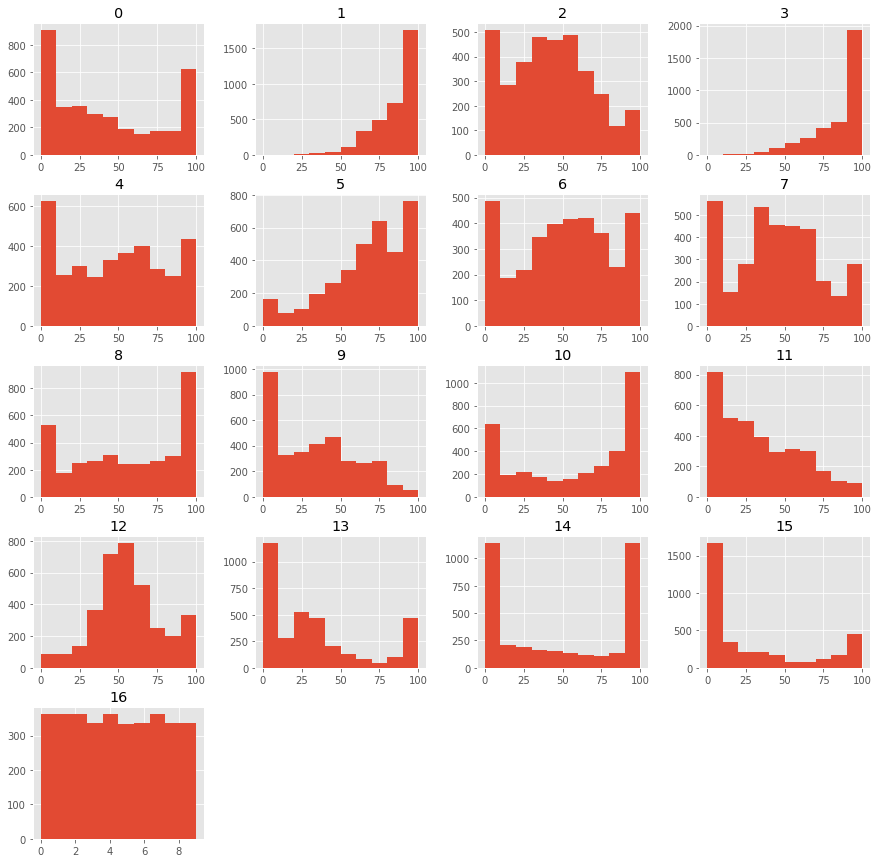

In [15]:
plt.style.use('ggplot')
pd.DataFrame.hist(df_test, figsize=[15,15])

### Similar to the training dataset we see that the test dataset also have few features in majority.Thus, we need to make sure we normalize and transform the test dataset as well. We also need to normalize test dataset according to the training dataset as the model will interpret the test dataset based on the training dataset thus we need to normalize test dataset based on the training dataset scale.

In [16]:
ini_X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,37.384307,84.679343,40.005604,82.889512,50.878303,65.044436,51.471844,44.599680,57.129971,34.069122,61.417401,35.782092,54.699760,35.800774,46.813718,28.565386
std,33.322024,16.848420,26.256025,19.638582,34.927201,27.377341,30.680075,30.659478,33.680340,27.459989,37.130762,27.495836,22.599781,33.223611,41.531794,35.811094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [17]:
ini_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7494 non-null   int64
 1   1       7494 non-null   int64
 2   2       7494 non-null   int64
 3   3       7494 non-null   int64
 4   4       7494 non-null   int64
 5   5       7494 non-null   int64
 6   6       7494 non-null   int64
 7   7       7494 non-null   int64
 8   8       7494 non-null   int64
 9   9       7494 non-null   int64
 10  10      7494 non-null   int64
 11  11      7494 non-null   int64
 12  12      7494 non-null   int64
 13  13      7494 non-null   int64
 14  14      7494 non-null   int64
 15  15      7494 non-null   int64
dtypes: int64(16)
memory usage: 936.9 KB


In [18]:
ini_X_test = df_test.drop(columns=16,axis=1)
ini_Y_test = df_test[16]

In [19]:
ini_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


### Starting the Normalization and Transformation process:

In [20]:
ini_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0


In [21]:
#after_X_train = pd.DataFrame(normalize(ini_X_train,axis=1))
#after_X_train.rename(columns={0:'47',1:'100',2:'27',3:'81',4:'57',5:'37',6:'26',7:'0',\
                         #8:'0.1',9:'23',10:'56',11:'53',12:'100.1',13:'90',14:'40',15:'98'},inplace=True)
#after_X_train

In [22]:
after_X_train = ini_X_train.copy()

In [23]:
after_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0


In [24]:
len(df_train.columns)

17

### Taking the mean and std deviation

In [25]:
## Taking the mean 
mean_col1 = ini_X_train.iloc[:,0].mean()
mean_col1

37.384307445956765

In [26]:
mean_col2 = ini_X_train.iloc[:,1].mean()
mean_col2

84.67934347477983

### Creating a mean_col list for calculating mean for each column and storing it :

In [27]:
mean_col = []
for each in ini_X_train.columns:
        
        mean_col.append(ini_X_train.loc[:,each].values)
        
for i in range(len(mean_col)):
    mean_col[i] = round(mean_col[i].mean(),3)        

mean_col

[37.384,
 84.679,
 40.006,
 82.89,
 50.878,
 65.044,
 51.472,
 44.6,
 57.13,
 34.069,
 61.417,
 35.782,
 54.7,
 35.801,
 46.814,
 28.565]

### Creating a standard deviation list for each column in X_train:

In [28]:
std_col1 = ini_X_train.iloc[:,0].std()
std_col1

33.32202413940688

In [29]:
std_col = []
for each in ini_X_train.columns:
        
        std_col.append(ini_X_train.loc[:,each].values)
        
for i in range(len(std_col)):
    std_col[i] = round(std_col[i].std(),3)        

std_col

[33.32,
 16.847,
 26.254,
 19.637,
 34.925,
 27.376,
 30.678,
 30.657,
 33.678,
 27.458,
 37.128,
 27.494,
 22.598,
 33.221,
 41.529,
 35.809]

In [30]:
ini_X_train.iloc[:,0].values

array([ 47,   0,   0, ..., 100,  59,   0], dtype=int64)

In [31]:
ini_X_train.iloc[:,0].values

array([ 47,   0,   0, ..., 100,  59,   0], dtype=int64)

In [32]:
ini_X_train.iloc[:,0].iloc[::]

0        47
1         0
2         0
3         0
4         0
       ... 
7489      0
7490     49
7491    100
7492     59
7493      0
Name: 0, Length: 7494, dtype: int64

### Calculating the transformation on the dataset:

In [33]:
(ini_X_train.iloc[:,1].iloc[0]-mean_col[1])/std_col[1]

0.9094200747907637

In [34]:
for col in range(len(ini_X_train.columns)):
        after_X_train.iloc[:,col].iloc[::] = ini_X_train.iloc[:,col].iloc[::].apply(lambda x:(x-mean_col[col])/std_col[col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
after_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.288595,0.909420,-0.495391,-0.096247,0.175290,-1.024401,-0.830302,-1.454806,-1.696360,-0.403125,-0.145901,0.626246,2.004602,1.631468,-0.164078,1.939038
1,-1.121969,0.256485,-0.495391,0.871314,-0.254202,0.363676,-0.732512,0.013048,-1.250965,-0.694479,-0.657644,-1.301448,0.632799,-1.017459,1.280695,-0.630149
2,-1.121969,-1.642963,-0.343033,-0.758262,0.604782,0.911601,1.581850,1.807091,0.560306,1.490677,-0.307504,0.553503,-1.181520,-0.325126,-0.741988,-0.797704
3,-1.121969,0.909420,-1.257180,0.463920,-1.313615,0.107978,-1.058478,0.013048,0.857236,-0.002513,1.039189,0.335273,0.854058,-0.385329,0.486070,-0.797704
4,-1.121969,-1.049386,0.342576,0.005602,1.406500,1.276885,0.962514,1.154712,0.085219,0.944388,-0.576842,0.153415,-0.960262,-0.475633,0.004479,-0.797704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,-1.121969,-0.159019,-1.181001,-1.216581,0.146657,-1.133986,-0.341352,-1.454806,-1.399430,-0.148190,-1.573395,1.135448,-0.561997,1.812077,1.280695,1.994890
7490,0.348619,0.909420,-1.523806,-0.656414,-0.769592,-0.330362,1.581850,0.665427,0.857236,1.854869,-0.469107,1.499163,-1.491282,0.066193,-0.982783,-0.797704
7491,1.879232,0.790705,0.761560,0.871314,-0.769592,0.802016,-1.580025,0.437094,-0.657106,0.616614,-0.092033,-0.355787,-0.827507,-1.077662,-1.127260,-0.658075
7492,0.648739,-1.168101,1.942333,0.871314,0.948375,1.130771,0.669144,0.176142,-0.182018,-0.949414,-1.654196,-1.301448,-0.429242,-1.047560,1.280695,-0.797704


In [36]:
after_X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.288595,0.909420,-0.495391,-0.096247,0.175290,-1.024401,-0.830302,-1.454806,-1.696360,-0.403125,-0.145901,0.626246,2.004602,1.631468,-0.164078,1.939038
1,-1.121969,0.256485,-0.495391,0.871314,-0.254202,0.363676,-0.732512,0.013048,-1.250965,-0.694479,-0.657644,-1.301448,0.632799,-1.017459,1.280695,-0.630149
2,-1.121969,-1.642963,-0.343033,-0.758262,0.604782,0.911601,1.581850,1.807091,0.560306,1.490677,-0.307504,0.553503,-1.181520,-0.325126,-0.741988,-0.797704
3,-1.121969,0.909420,-1.257180,0.463920,-1.313615,0.107978,-1.058478,0.013048,0.857236,-0.002513,1.039189,0.335273,0.854058,-0.385329,0.486070,-0.797704
4,-1.121969,-1.049386,0.342576,0.005602,1.406500,1.276885,0.962514,1.154712,0.085219,0.944388,-0.576842,0.153415,-0.960262,-0.475633,0.004479,-0.797704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,-1.121969,-0.159019,-1.181001,-1.216581,0.146657,-1.133986,-0.341352,-1.454806,-1.399430,-0.148190,-1.573395,1.135448,-0.561997,1.812077,1.280695,1.994890
7490,0.348619,0.909420,-1.523806,-0.656414,-0.769592,-0.330362,1.581850,0.665427,0.857236,1.854869,-0.469107,1.499163,-1.491282,0.066193,-0.982783,-0.797704
7491,1.879232,0.790705,0.761560,0.871314,-0.769592,0.802016,-1.580025,0.437094,-0.657106,0.616614,-0.092033,-0.355787,-0.827507,-1.077662,-1.127260,-0.658075
7492,0.648739,-1.168101,1.942333,0.871314,0.948375,1.130771,0.669144,0.176142,-0.182018,-0.949414,-1.654196,-1.301448,-0.429242,-1.047560,1.280695,-0.797704


In [37]:
ini_Y_train

0       8
1       2
2       1
3       4
4       1
       ..
7489    5
7490    4
7491    5
7492    1
7493    7
Name: 16, Length: 7494, dtype: int64

## Doing the same Normalization and Transformation to the test dataset:

In [38]:
ini_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [39]:
after_X_test = ini_X_test.copy()

In [40]:
#after_X_test = pd.DataFrame(normalize(ini_X_test,axis=1))
#after_X_test.rename(columns={0:'88',1:'92',2:'2',3:'99',4:'16',5:'66',6:'94',7:'37',\
#                         8:'70',9:'0',10:'0.1',11:'24',12:'42',13:'65',14:'100',15:'100.1'},inplace=True)

In [41]:
after_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [42]:
(ini_X_test.iloc[:,1].iloc[0]-mean_col[1])/std_col[1]

0.43455808155754716

In [43]:
for col in range(len(ini_X_test.columns)):
        after_X_test.iloc[:,col].iloc[::] = ini_X_test.iloc[:,col].iloc[::].apply(lambda x:(x-mean_col[col])/std_col[col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
after_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.519088,0.434558,-1.447627,0.820390,-0.998654,0.034921,1.386270,-0.247904,0.382149,-1.240768,-1.654196,-0.428530,-0.561997,0.878932,1.280695,1.994890
1,1.278992,0.909420,-0.838196,0.769466,0.261188,0.034921,1.581850,-0.508856,-0.449255,-1.240768,-1.654196,-0.464901,-0.561997,0.758526,0.221195,1.939038
2,-1.121969,0.553274,-1.181001,-1.318429,-0.884123,-1.681911,-1.449638,-1.454806,-1.102500,0.070326,0.231173,1.171819,2.004602,1.932482,-0.693828,1.771482
3,1.729172,-0.159019,1.180544,0.871314,-0.683694,0.436733,0.832127,0.926379,1.272938,1.672773,0.850652,0.226158,0.057527,-0.686343,-1.127260,-0.797704
4,0.918848,0.909420,-1.295269,0.260223,-0.111038,0.363676,1.158094,1.219950,0.827543,0.798711,1.039189,-0.246672,0.898310,-0.897053,-1.127260,-0.797704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,-0.041537,0.909420,-0.609659,-0.656414,-1.456779,-0.987873,-0.080579,-0.378380,1.124473,0.470937,0.689049,0.698989,1.827595,-0.445531,1.280695,-0.797704
3494,-0.641777,-0.574524,0.037861,0.871314,0.032126,-0.038136,-0.634722,-0.574094,-1.696360,-1.240768,-1.088585,-0.974103,0.323037,-1.017459,1.280695,-0.406741
3495,0.558703,0.909420,-0.495391,-0.198095,-1.456779,-0.951344,-1.286655,-1.454806,0.263377,-0.694479,1.039189,0.553503,1.694840,1.721772,-0.212237,1.799408
3496,-0.551741,0.909420,-1.523806,-1.114732,-1.370880,-1.535798,-0.113176,-1.454806,1.183859,-0.257448,1.039189,1.099076,0.323037,1.842178,-0.886465,1.464297


In [45]:
after_X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.519088,0.434558,-1.447627,0.820390,-0.998654,0.034921,1.386270,-0.247904,0.382149,-1.240768,-1.654196,-0.428530,-0.561997,0.878932,1.280695,1.994890
1,1.278992,0.909420,-0.838196,0.769466,0.261188,0.034921,1.581850,-0.508856,-0.449255,-1.240768,-1.654196,-0.464901,-0.561997,0.758526,0.221195,1.939038
2,-1.121969,0.553274,-1.181001,-1.318429,-0.884123,-1.681911,-1.449638,-1.454806,-1.102500,0.070326,0.231173,1.171819,2.004602,1.932482,-0.693828,1.771482
3,1.729172,-0.159019,1.180544,0.871314,-0.683694,0.436733,0.832127,0.926379,1.272938,1.672773,0.850652,0.226158,0.057527,-0.686343,-1.127260,-0.797704
4,0.918848,0.909420,-1.295269,0.260223,-0.111038,0.363676,1.158094,1.219950,0.827543,0.798711,1.039189,-0.246672,0.898310,-0.897053,-1.127260,-0.797704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,-0.041537,0.909420,-0.609659,-0.656414,-1.456779,-0.987873,-0.080579,-0.378380,1.124473,0.470937,0.689049,0.698989,1.827595,-0.445531,1.280695,-0.797704
3494,-0.641777,-0.574524,0.037861,0.871314,0.032126,-0.038136,-0.634722,-0.574094,-1.696360,-1.240768,-1.088585,-0.974103,0.323037,-1.017459,1.280695,-0.406741
3495,0.558703,0.909420,-0.495391,-0.198095,-1.456779,-0.951344,-1.286655,-1.454806,0.263377,-0.694479,1.039189,0.553503,1.694840,1.721772,-0.212237,1.799408
3496,-0.551741,0.909420,-1.523806,-1.114732,-1.370880,-1.535798,-0.113176,-1.454806,1.183859,-0.257448,1.039189,1.099076,0.323037,1.842178,-0.886465,1.464297


In [46]:
ini_Y_test

0       8
1       8
2       8
3       9
4       9
       ..
3493    4
3494    2
3495    0
3496    0
3497    4
Name: 16, Length: 3498, dtype: int64

### Here, what we have done is bring some uniformity to the datapoints in the datasets which helps in  avoiding the model to introduce bias in its decision making. First, we normalized the data points i.e. make the points between 0 and 1. Then we transformed or scaled the data points, this makes the points distribute around the centre so that we get something like a bell curve.

In [47]:
type(ini_X_train.columns[0])

numpy.int64

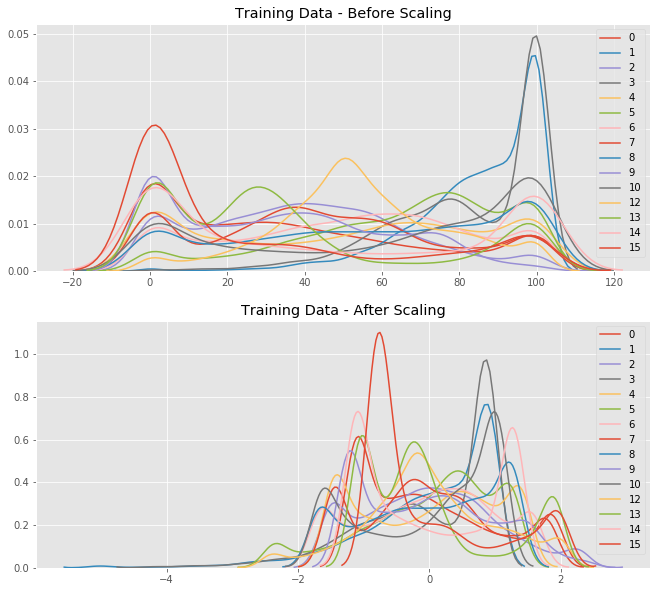

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(11, 10))

ax1.set_title('Training Data - Before Scaling')
sns.kdeplot(ini_X_train.iloc[:,0], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,1], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,2], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,3], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,4], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,5], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,6], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,7], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,8], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,9], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,10], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,12], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,13], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,14], ax=ax1)
sns.kdeplot(ini_X_train.iloc[:,15], ax=ax1)

ax2.set_title('Training Data - After Scaling')
sns.kdeplot(after_X_train.iloc[:,0], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,1], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,2], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,3], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,4], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,5], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,6], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,7], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,8], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,9], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,10], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,12], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,13], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,14], ax=ax2)
sns.kdeplot(after_X_train.iloc[:,15], ax=ax2)

plt.show()


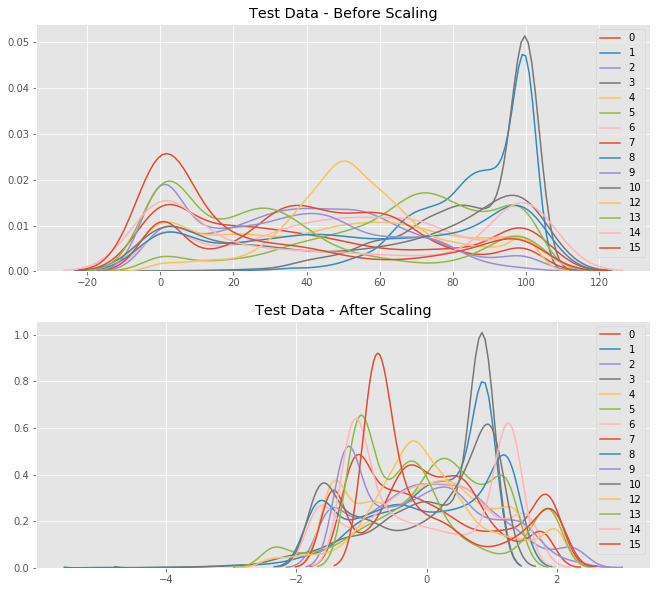

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(11, 10))

ax1.set_title('Test Data - Before Scaling')
sns.kdeplot(ini_X_test.iloc[:,0], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,1], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,2], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,3], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,4], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,5], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,6], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,7], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,8], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,9], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,10], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,12], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,13], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,14], ax=ax1)
sns.kdeplot(ini_X_test.iloc[:,15], ax=ax1)

ax2.set_title('Test Data - After Scaling')
sns.kdeplot(after_X_test.iloc[:,0], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,1], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,2], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,3], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,4], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,5], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,6], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,7], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,8], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,9], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,10], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,12], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,13], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,14], ax=ax2)
sns.kdeplot(after_X_test.iloc[:,15], ax=ax2)

plt.show()


### We see that before scaling, only two-four dimensions dominated the entire dataset. After scaling we observe that all the dimensions are spread around 0 and even though two dimensions are still at peaks, other dimensions are also relatively in focus and not dominated by only 2-3 peaks. <br> This helps the model to avoid any data bias and now we can proceed to build our model on training data. 

### A way to guess the K value is by calculating the best accuracy performance of the model:

In [50]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(after_X_train, ini_Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(after_X_train, ini_Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(after_X_test, ini_Y_test)

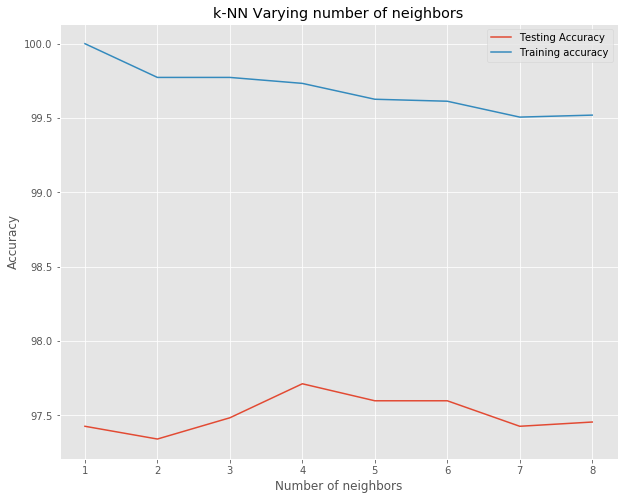

In [51]:
#Generate plot
plt.figure(figsize=[10,8])
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy*100, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy*100, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Here we see that the test dataset has highest accuracy for k=4 (97.8%). Thus, lets select the k as 4


In [52]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [53]:
#Fit the model
knn.fit(after_X_train,ini_Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [54]:
# Get accuracy. 
print('The model accuracy is:',round(knn.score(after_X_test,ini_Y_test)*100,3),'%')

The model accuracy is: 97.713 %


In [55]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [56]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(after_X_test)

In [57]:
confMatrix = confusion_matrix(ini_Y_test,y_pred)
pd.crosstab(ini_Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,353,0,0,0,0,0,3,0,2,5,363
1,0,355,7,0,1,0,0,1,0,0,364
2,0,3,361,0,0,0,0,0,0,0,364
3,0,1,0,333,0,0,0,0,0,2,336
4,0,0,0,0,354,8,2,0,0,0,364
5,0,0,0,6,0,328,0,0,0,1,335
6,0,0,0,0,0,0,336,0,0,0,336
7,0,14,2,0,2,0,0,346,0,0,364
8,1,0,0,0,1,1,0,0,333,0,336


In [58]:
ini_Y_test.unique()

array([8, 9, 1, 4, 7, 0, 2, 5, 3, 6], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
labels = []
for i in range(len(ini_Y_test.unique())):
    i=i+1
    labels.append('pendigit '+str(i))

print(classification_report(ini_Y_test, y_pred,target_names=labels))

              precision    recall  f1-score   support

  pendigit 1       1.00      0.97      0.98       363
  pendigit 2       0.94      0.98      0.96       364
  pendigit 3       0.98      0.99      0.98       364
  pendigit 4       0.97      0.99      0.98       336
  pendigit 5       0.99      0.97      0.98       364
  pendigit 6       0.96      0.98      0.97       335
  pendigit 7       0.99      1.00      0.99       336
  pendigit 8       0.99      0.95      0.97       364
  pendigit 9       0.99      0.99      0.99       336
 pendigit 10       0.98      0.95      0.96       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



### Lets calculate the error_rate in the model :

In [60]:
error_rate = []
error_rate.append(np.mean(y_pred != ini_Y_test))
print('The error involved in this model is around:',round((error_rate[0])*100,3),'%')

The error involved in this model is around: 2.287 %


### <font color='Salmon'> Lets select the value of K for the KNN model, this value is the value where least test error rate value for a particular k value in the model. Doing a K-fold cross validation(doing a 10 fold cross validation below) we can find out the optimum value for K. </font>

In [118]:
# Lets check for odd numbers first to make it time efficient to find the K for KNN
neighbors = list(range(1, 15,2)) ## We are starting from 1 till 15 and selecting every odd number 

# Making an empty list to store the cross validation scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, after_X_train,ini_Y_train, cv=20, scoring='accuracy') 
    cv_scores.append(scores.mean())

In [119]:
cv_scores

[0.9943975044563281,
 0.9954631016042781,
 0.9939957219251336,
 0.9931942959001784,
 0.9910602495543671,
 0.9898584670231729,
 0.9886581105169341]

The optimal number of neighbors is 3


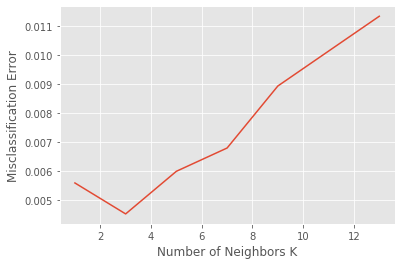

In [120]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [121]:
#Setup a knn classifier with k neighbors
knn_cv = KNeighborsClassifier(n_neighbors=optimal_k)

In [122]:
#Fit the model
knn_cv.fit(after_X_train,ini_Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [123]:
#let us get the predictions using the classifier we had fit above
y_pred_cv = knn_cv.predict(after_X_test)

In [124]:
# Get accuracy for the K-fold cross validated model
print('The model accuracy with K-Fold Cross Validation is:',round(knn_cv.score(after_X_test,ini_Y_test)*100,3),'%')

The model accuracy with K-Fold Cross Validation is: 97.484 %


### Lets calculate the error_rate in the model :

In [125]:
error_rate_cv = [] ## create an empty list
error_rate_cv.append(np.mean(y_pred_cv != ini_Y_test)) ##take the mean/avg of the y_pred values which are not ini_Y_test
print('The error involved in K-fold cross validation tuned model is around:',round((error_rate_cv[0])*100,3),'%')

The error involved in K-fold cross validation tuned model is around: 2.516 %


### For both the methods described above, we see that as compared to K-fold cross validation, selecting k based on accuracy gives us better results for k =4 as opposed to K-fold cross validation's selection of k=3.<br>The accuracy model is better in this scenario as its accuracy is better than k-fold cross validation tuning method.

### <font color='Salmon'>Lets checkout another cross validation method for selecting the value for k which is called as GridSearchCV

In [96]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [97]:
##n_neighbors is the parameter for tuning knn and we are also giving metric  
param_grid = {'n_neighbors':np.arange(1,15)} ## We usually choose odd numbers but here we can giving from 1 to 15 to see which is best  

In [98]:
knn_gs = KNeighborsClassifier() ## Knn classfier

knn_gs_o = GridSearchCV(knn_gs,param_grid,verbose=1,cv=5,n_jobs=-1,return_train_score=True) ## here we are specifying cv as 5 fold
knn_gs_o.fit(after_X_train,ini_Y_train) ## fitting the model on our training data

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [99]:
knn_gs_o.best_params_
## This is giving us the k value for which the model has got the best results

{'n_neighbors': 3}

In [100]:
print('The best score for model for k=3 is:',round(knn_gs_o.best_score_*100,2),'%')

The best score for model for k=3 is: 99.43 %


In [101]:
#let us get the predictions using the classifier we had fit above
y_pred_gs_o = knn_gs_o.predict(after_X_test)

### Lets calculate the error_rate in the model :

In [102]:
error_rate_gs = []
error_rate_gs.append(np.mean(y_pred_gs_o != ini_Y_test))
print('The error involved in gridsearchCV tuned model is around:',round((error_rate_gs[0])*100,3),'%')

The error involved in gridsearchCV tuned model is around: 2.516 %


### Using the GridSearch Cross Validation, the model with number of neighbhors =3 achieves the best accuracy socre of 99.43%

In [103]:
print('The accuracy and error rate using just the accuarcy method with k=4 is:',\
      round(knn.score(after_X_test,ini_Y_test)*100,3),'% and ',round((error_rate[0])*100,3),'%')
print('The accuracy and error rate using k-Fold cross validation method with k=',optimal_k,'is:',\
      round(knn_cv.score(after_X_test,ini_Y_test)*100,3),'% and ',round((error_rate_cv[0])*100,3),'%')
print('The accuracy and error rate using Grid Search cross validation method with k=3 is:',\
      round(knn_gs_o.best_score_*100,3),'% and ',round((error_rate_gs[0])*100,3),'%')

The accuracy and error rate using just the accuarcy method with k=4 is: 97.713 % and  2.287 %
The accuracy and error rate using k-Fold cross validation method with k= 3 is: 97.484 % and  2.516 %
The accuracy and error rate using Grid Search cross validation method with k=3 is: 99.426 % and  2.516 %


### In comparison, we see that the model has perfect accuracy at k=3 when we tune it using Grid Search cross validation. The model behaves almost the same for k=3 by K-fold cross validation tuning and k=4 for accuracy based tuning. The error rate is greater when we use the Grid Search cross validation( 2.516 %) as compared to either K-Fold cross validation(2.516%) and accuracy based models (error rate=2.287%)<br><br>The best accuracy with a slightly larger error_rate for the Grid Search tuned knn model for k=3 looks perfect for our application of classifying pendigits.  
